<a href="https://colab.research.google.com/github/Professor-Sathish/GE8151_PSPP/blob/master/faceproa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install face-recognition

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#train faces
#module 0
import face_recognition

sathish = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/sathish.jpg")
sathish_encoding = face_recognition.face_encodings(picture_of_me)[0]
dinesh = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/dinesh.jpg")
dinesh_encoding = face_recognition.face_encodings(picture_of_me)[0]
rajesh= face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/rajesh.jpg")
rajesh_encoding = face_recognition.face_encodings(picture_of_me)[0]
venkadesh = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/venkadesh.jpg")
venkadesh_encoding = face_recognition.face_encodings(picture_of_me)[0]
#print("Training input image array")
#im = Image.open("/content/gdrive/My Drive/Face attendance project/obama-training.jpg")
#display(picture_of_me)

Total  3 Members found in this photograph.
A face is located at pixel location Top: 399, Left: 627, Bottom: 517, Right: 744
It's not a picture of sathish


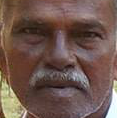

A face is located at pixel location Top: 466, Left: 887, Bottom: 608, Right: 1028
It's a picture of sathish


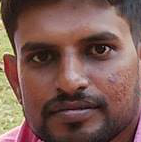

A face is located at pixel location Top: 523, Left: 1245, Bottom: 665, Right: 1386
It's not a picture of sathish


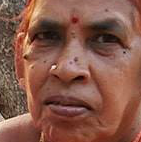

In [81]:
#find_faces_in_picture
#module1
from PIL import Image
import face_recognition
import cv2


# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/fg2.jpg")
#print("input image")
#display(image)
# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
#face_locations = face_recognition.face_locations(image)
 #number_of_times_to_upsample=0,
face_locations = face_recognition.face_locations(image, model="cnn")

print("Total  {} Members found in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    im = Image.open("/content/gdrive/My Drive/Face attendance project/fg2.jpg")
    im = im.crop((left, top, right, bottom))
    im.save('/content/gdrive/My Drive/Face attendance project/un.jpeg')
    
    # my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!
    un = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/un.jpeg")
    
    unknown_face_encoding = face_recognition.face_encodings(un)[0]
    

    # Now we can see the two face encodings are of the same person with `compare_faces`!
    results = face_recognition.compare_faces([sathish_encoding], unknown_face_encoding)
    if results[0] == True:
      print("It's a picture of sathish")
      display(pil_image)
    else:
      print("It's not a picture of sathish")
      display(pil_image)
    

Total  6 Members found in this photograph.


/usr/local/lib/python3.6/dist-packages/PIL/ImageDraw.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return split_character in text


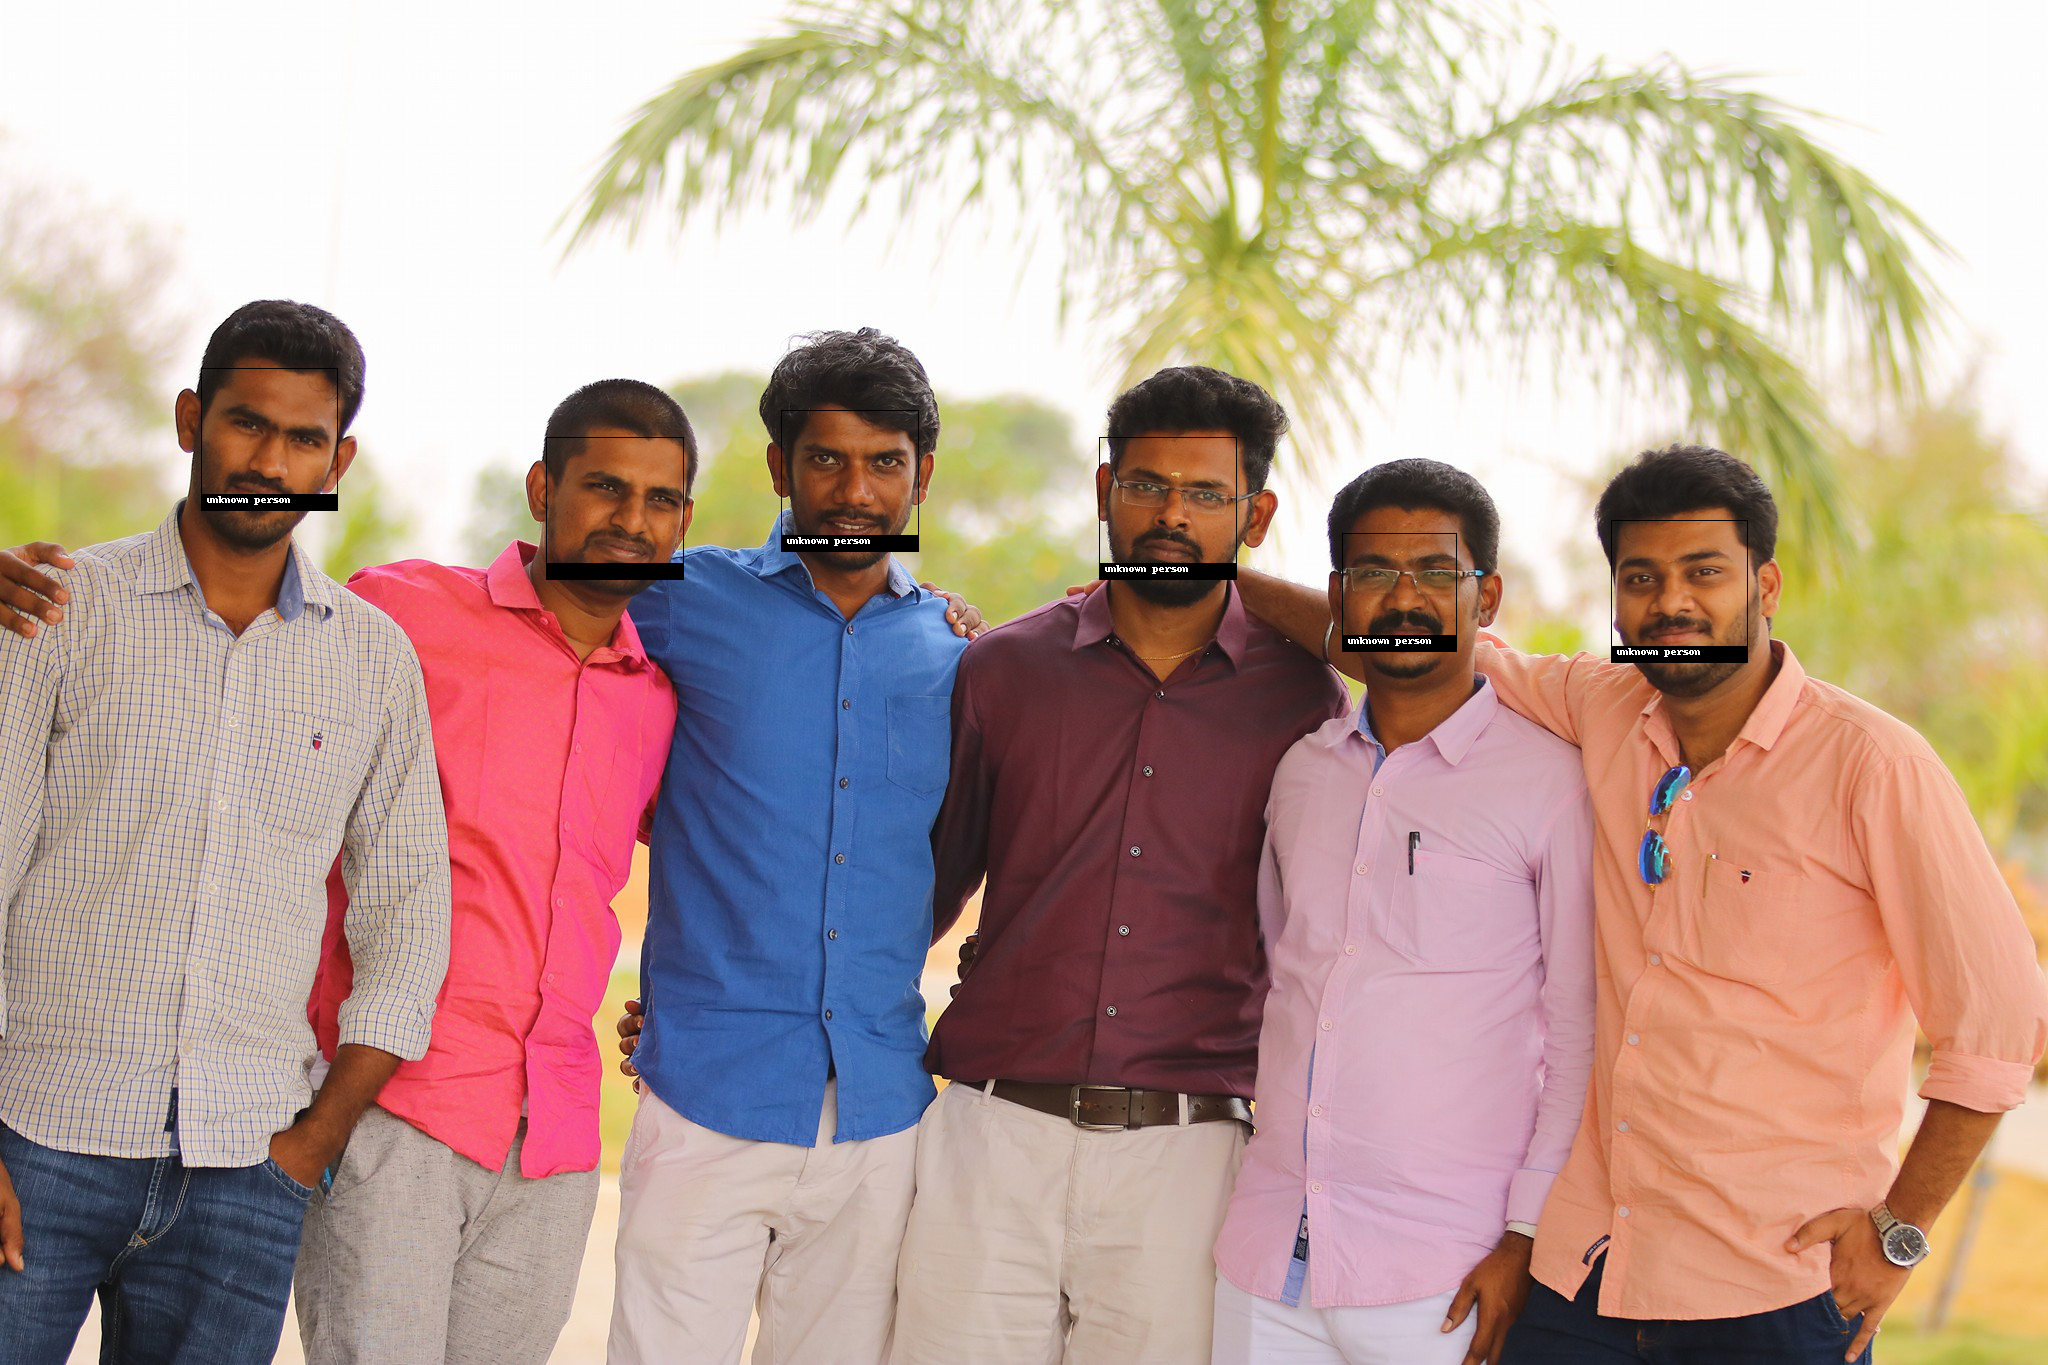

In [82]:
#find_faces_in_picture using array
#module 2
from PIL import Image,ImageDraw
import face_recognition
import cv2
import numpy as np

#training
known_face_encodings = [sathish_encoding,dinesh_encoding,rajesh_encoding,venkadesh_encoding]
known_face_names=[sathish,dinesh,rajesh,venkadesh]

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/frg2.jpg")
face_locations = face_recognition.face_locations(image,number_of_times_to_upsample=0, model="cnn")
face_encodings=face_recognition.face_encodings(image,face_locations)

print("Total  {} Members found in this photograph.".format(len(face_locations)))

#convert
pill_image=Image.fromarray(image)

#draw
draw=ImageDraw.Draw(pill_image)

#loop through test images

for (top,right,bottom,left),face_encoding in zip(face_locations,face_encodings):
  matches=face_recognition.compare_faces(known_face_encodings,face_encoding)
  name="unknown person"
  #match tue
  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
    #draw rectangle
  draw.rectangle(((left,top),(right,bottom)),outline=(0,0,0))
    #draw label
  text_width,text_height=draw.textsize(name)
  draw.rectangle(((left,bottom-text_height),(right,bottom+5)),fill=(0,0,0),outline=(0,0,0))
  draw.text((left+6,bottom-text_height),name,fill=(255,255,255,255))
del draw

#display image
display(pill_image)

#save
pill_image.save('/content/gdrive/My Drive/Face attendance project/identify.jpg')

Total  6 Members found in this photograph.
Unknown


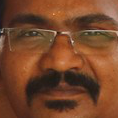

sathish


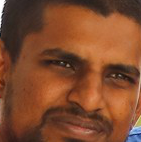

Unknown


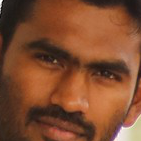

Unknown


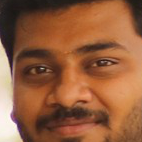

Unknown


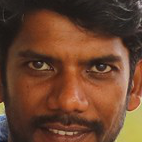

Unknown


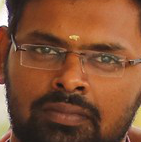

In [83]:
#find_faces_in_picture using array
#module 3
from PIL import Image,ImageDraw
import face_recognition
import cv2
import numpy as np

#training
known_face_encodings = [sathish_encoding,dinesh_encoding,rajesh_encoding,venkadesh_encoding]
known_face_names=["sathish","dinesh","rajesh","venkadesh"]

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/frg2.jpg")
face_locations = face_recognition.face_locations(image,number_of_times_to_upsample=1, model="cnn")
face_encodings=face_recognition.face_encodings(image,face_locations)
#print(face_encodings)

print("Total  {} Members found in this photograph.".format(len(face_locations)))



#convert
pill_image=Image.fromarray(image)

#draw
draw=ImageDraw.Draw(pill_image)

#loop through test images

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)

        name = "Unknown"


        # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
        print(name)
        display(pil_image)
  

ERROR! Session/line number was not unique in database. History logging moved to new session 62
Total  6 Members found in this photograph.
sathish is present


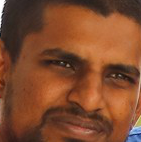

In [84]:
#find_faces_in_picture using array
#module 4
from PIL import Image,ImageDraw
import face_recognition
import cv2
import numpy as np

#training
known_face_encodings = [sathish_encoding,dinesh_encoding,rajesh_encoding,venkadesh_encoding]
known_face_names=["sathish","dinesh","rajesh","venkadesh"]

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face attendance project/frg2.jpg")
face_locations = face_recognition.face_locations(image,number_of_times_to_upsample=1, model="cnn")
face_encodings=face_recognition.face_encodings(image,face_locations)
#print(face_encodings)

print("Total  {} Members found in this photograph.".format(len(face_locations)))



#convert
pill_image=Image.fromarray(image)

#draw
draw=ImageDraw.Draw(pill_image)

#loop through test images

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)

        name = "Unknown"


        # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
            print(name+" is present")
            display(pil_image)